# Analisis de precios de viviendas y locales #
### Por Juan Felipe Bautista ###

En este cuaderno se realizó un análisis para:


1 - Determinar la distribución de inmuebles deacuerdo al estrato y departamento

2 - Hallar las medidas de tendencia central de los precios de los inmuebles

3 - Contar los inmuebles deacuerdo a su disponibilidad y tipo

## Limpieza de datos ##

#### Importación de librerías: ####

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Leer archivo CSV ####

In [6]:
inmuebles = pd.read_csv('Inmuebles.csv')

#### Información del dataset ####

In [9]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Codigo                  448 non-null    int64 
 1   Ciudad                  448 non-null    object
 2   Departamento            448 non-null    object
 3   Barrio                  59 non-null     object
 4   Direccion               448 non-null    object
 5   Area Terreno            448 non-null    int64 
 6   Area Construida         448 non-null    int64 
 7   Detalle Disponibilidad  448 non-null    object
 8   Estrato                 448 non-null    object
 9   Precio                  448 non-null    int64 
 10  Tipo de Inmueble        448 non-null    object
 11  Datos Adicionales       77 non-null     object
dtypes: int64(4), object(8)
memory usage: 42.1+ KB


#### Crear un dataframe ####

In [12]:
df_inmuebles = pd.DataFrame(inmuebles)
df_inmuebles.head(5)

,Codigo,Ciudad,Departamento,Barrio,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,Datos Adicionales
0,17745,BOGOTA,CUNDINAMARCA,NaN,CALLE 22D NO. 120-19 -FONTIBÓN,0,0,COMERCIALIZABLE CON RESTRICCION,INDUSTRIAL,274462556400000,BODEGA,NaN
1,17778,BOGOTA,CUNDINAMARCA,NaN,KR 77 H No. 65 C - 33 SUR,0,0,COMERCIALIZABLE CON RESTRICCION,DOS,27076410000000,LOTE CON CONSTRUCCION,NaN
2,17797,BOGOTA,CUNDINAMARCA,NaN,CR 70 No. 49-77,0,0,COMERCIALIZABLE CON RESTRICCION,CUATRO,14482416000000,CASA,NaN
3,17798,PEREIRA,RISARALDA,NaN,CALLES 18 Y 19 CARRERAS 5 Y 6 SALIDA CARRERA...,0,0,COMERCIALIZABLE CON RESTRICCION,CINCO,43343535000000,CLINICA,NaN
4,12115,CALIMA EL DARIEN,VALLE DEL CAUCA,VEREDA PALERMO,LT 1C,6400000,70000,COMERCIALIZABLE FIDUCIA,RURAL,10428866940000,LOTE VIVIENDA,LOTE DE TERRENO QUE HACE PARTE DEL PROYECTO CA...


#### Número de registros y columnas ####

In [15]:
filas = len(df_inmuebles)
columnas = len(df_inmuebles.columns)
numericas = df_inmuebles.dtypes[df_inmuebles.dtypes == 'int64']
categoricas = df_inmuebles.dtypes[df_inmuebles.dtypes == 'object']

print('Numero de filas:', filas)
print('Numero de columnas:', columnas,'\n')
print('Columnas numéricas:','\n')
print(numericas,'\n')
print('Columnas categóricas:','\n')
print(categoricas)

Numero de filas: 448
Numero de columnas: 12 

Columnas numéricas: 

Codigo             int64
Area Terreno       int64
Area Construida    int64
Precio             int64
dtype: object 

Columnas categóricas: 

Ciudad                    object
Departamento              object
Barrio                    object
Direccion                 object
Detalle Disponibilidad    object
Estrato                   object
Tipo de Inmueble          object
Datos Adicionales         object
dtype: object


#### Contar valores nulos: ####

In [18]:
inmuebles.isnull().sum()

Codigo                      0
Ciudad                      0
Departamento                0
Barrio                    389
Direccion                   0
Area Terreno                0
Area Construida             0
Detalle Disponibilidad      0
Estrato                     0
Precio                      0
Tipo de Inmueble            0
Datos Adicionales         371
dtype: int64

#### Determinar si existen duplicados ####

In [21]:
duplicados = df_inmuebles.duplicated().sum()

if duplicados == 0:
    print("No hay duplicados")
else:
    print(duplicados)

No hay duplicados


Las columnas "Barrio" y "Datos Adicionales" poseen muchos valores nulos, y las columnas "Area Terreno" y "Area Construida" son irrelevantes al ser la mayoría de sus valores 0 los cuales no parecen tener influencia en los precios de los inmuebles.

#### Eliminar columnas ####

In [25]:
df_inmuebles.drop(['Barrio', 'Area Terreno', 'Area Construida', 'Datos Adicionales'], 
                  axis=1, 
                  inplace=True)
# Si se ejecuta la celda nuevamente va a presentarse un error debido a que las columnas ya fueron borradas

La columna 'Direccion' es eliminada ya que es irrelevante tanto para un analisis cualitativo como cuantitativo al ser categorica y poseer en su mayoria valores únicos

In [28]:
df_inmuebles.drop(['Direccion'], 
                  axis=1, 
                  inplace=True)
# Si se ejecuta la celda nuevamente va a presentarse un error debido a que la columnas ya fue borrada

Nuevo Dataframe resultante

In [31]:
# Dataframe resultante
df_inmuebles.head(5)

,Codigo,Ciudad,Departamento,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble
0,17745,BOGOTA,CUNDINAMARCA,COMERCIALIZABLE CON RESTRICCION,INDUSTRIAL,274462556400000,BODEGA
1,17778,BOGOTA,CUNDINAMARCA,COMERCIALIZABLE CON RESTRICCION,DOS,27076410000000,LOTE CON CONSTRUCCION
2,17797,BOGOTA,CUNDINAMARCA,COMERCIALIZABLE CON RESTRICCION,CUATRO,14482416000000,CASA
3,17798,PEREIRA,RISARALDA,COMERCIALIZABLE CON RESTRICCION,CINCO,43343535000000,CLINICA
4,12115,CALIMA EL DARIEN,VALLE DEL CAUCA,COMERCIALIZABLE FIDUCIA,RURAL,10428866940000,LOTE VIVIENDA


#### Buscar irregularidades en la columna Precios ####

In [34]:
df_inmuebles['Precio'].sort_values(ascending=True, na_position='first')

384                  0
54         65990400000
317        69750000000
53         70012400000
116        70250000000
            ...       
440    164605915000000
0      274462556400000
50     295808119000000
73     328393170351500
21     452337898200000
Name: Precio, Length: 448, dtype: int64

Se elimina la fila 384 con el valor de Precio 0, al ser un único valor irregular de 448 registros afecta en poco o nada el análisis del dataset

In [37]:
df_inmuebles.drop([384])

,Codigo,Ciudad,Departamento,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble
0,17745,BOGOTA,CUNDINAMARCA,COMERCIALIZABLE CON RESTRICCION,INDUSTRIAL,274462556400000,BODEGA
1,17778,BOGOTA,CUNDINAMARCA,COMERCIALIZABLE CON RESTRICCION,DOS,27076410000000,LOTE CON CONSTRUCCION
2,17797,BOGOTA,CUNDINAMARCA,COMERCIALIZABLE CON RESTRICCION,CUATRO,14482416000000,CASA
3,17798,PEREIRA,RISARALDA,COMERCIALIZABLE CON RESTRICCION,CINCO,43343535000000,CLINICA
4,12115,CALIMA EL DARIEN,VALLE DEL CAUCA,COMERCIALIZABLE FIDUCIA,RURAL,10428866940000,LOTE VIVIENDA
...,...,...,...,...,...,...,...
443,19304,BOGOTA,CUNDINAMARCA,COMERCIALIZABLE TERCEROS,SEIS,20426879879800,APARTAMENTO
444,19330,BOGOTA,CUNDINAMARCA,COMERCIALIZABLE CON RESTRICCION,TRES,303688000000,LOCAL
445,19331,VILLAVICENCIO,META,COMERCIALIZABLE VENTA ANTICIPADA,CINCO,10400137300000,CASA
446,19339,TARAZA,ANTIOQUIA,COMERCIALIZABLE TERCEROS,DOS,807621000000,APARTAMENTO


#### Crear una nueva columna con un rango de precios ####

Se crea una columna deacuerdo a la cantidad de cifras del precio del inmueble

In [41]:
df_inmuebles['Rango por cifras'] = df_inmuebles.apply(lambda row: len(str(row.Precio)), 
                                                      axis = 1)

#### Reorganizar columna ####

Se reorganiza las columnas del dataframe para que tenga más coherencia

In [45]:
df_inmuebles = df_inmuebles.reindex(columns=['Codigo',
                                             'Ciudad',
                                             'Departamento',
                                             'Tipo de Inmueble',
                                             'Estrato', 
                                             'Detalle Disponibilidad',
                                             'Precio',
                                             'Rango por cifras'])

In [47]:
df_inmuebles

,Codigo,Ciudad,Departamento,Tipo de Inmueble,Estrato,Detalle Disponibilidad,Precio,Rango por cifras
0,17745,BOGOTA,CUNDINAMARCA,BODEGA,INDUSTRIAL,COMERCIALIZABLE CON RESTRICCION,274462556400000,15
1,17778,BOGOTA,CUNDINAMARCA,LOTE CON CONSTRUCCION,DOS,COMERCIALIZABLE CON RESTRICCION,27076410000000,14
2,17797,BOGOTA,CUNDINAMARCA,CASA,CUATRO,COMERCIALIZABLE CON RESTRICCION,14482416000000,14
3,17798,PEREIRA,RISARALDA,CLINICA,CINCO,COMERCIALIZABLE CON RESTRICCION,43343535000000,14
4,12115,CALIMA EL DARIEN,VALLE DEL CAUCA,LOTE VIVIENDA,RURAL,COMERCIALIZABLE FIDUCIA,10428866940000,14
...,...,...,...,...,...,...,...,...
443,19304,BOGOTA,CUNDINAMARCA,APARTAMENTO,SEIS,COMERCIALIZABLE TERCEROS,20426879879800,14
444,19330,BOGOTA,CUNDINAMARCA,LOCAL,TRES,COMERCIALIZABLE CON RESTRICCION,303688000000,12
445,19331,VILLAVICENCIO,META,CASA,CINCO,COMERCIALIZABLE VENTA ANTICIPADA,10400137300000,14
446,19339,TARAZA,ANTIOQUIA,APARTAMENTO,DOS,COMERCIALIZABLE TERCEROS,807621000000,12


## Datos estadísticos ##

#### Promedio de precios ####

In [51]:
round(df_inmuebles['Precio'].mean())

9372905838386

#### Mediana de precios ####

In [54]:
df_inmuebles['Precio'].median()

165205000000.0

#### Desviación estandar de precios ####

In [57]:
df_inmuebles['Precio'].std()

38179638410194.945

#### Media de rango de precios por cifras ####

In [60]:
round(df_inmuebles['Rango por cifras'].mean())

12

#### Moda de rango de precios por cifras ####

In [63]:
df_inmuebles['Rango por cifras'].mode()

0    12
Name: Rango por cifras, dtype: int64

## Graficos ##

#### Distribución de inmuebles por estrato ####

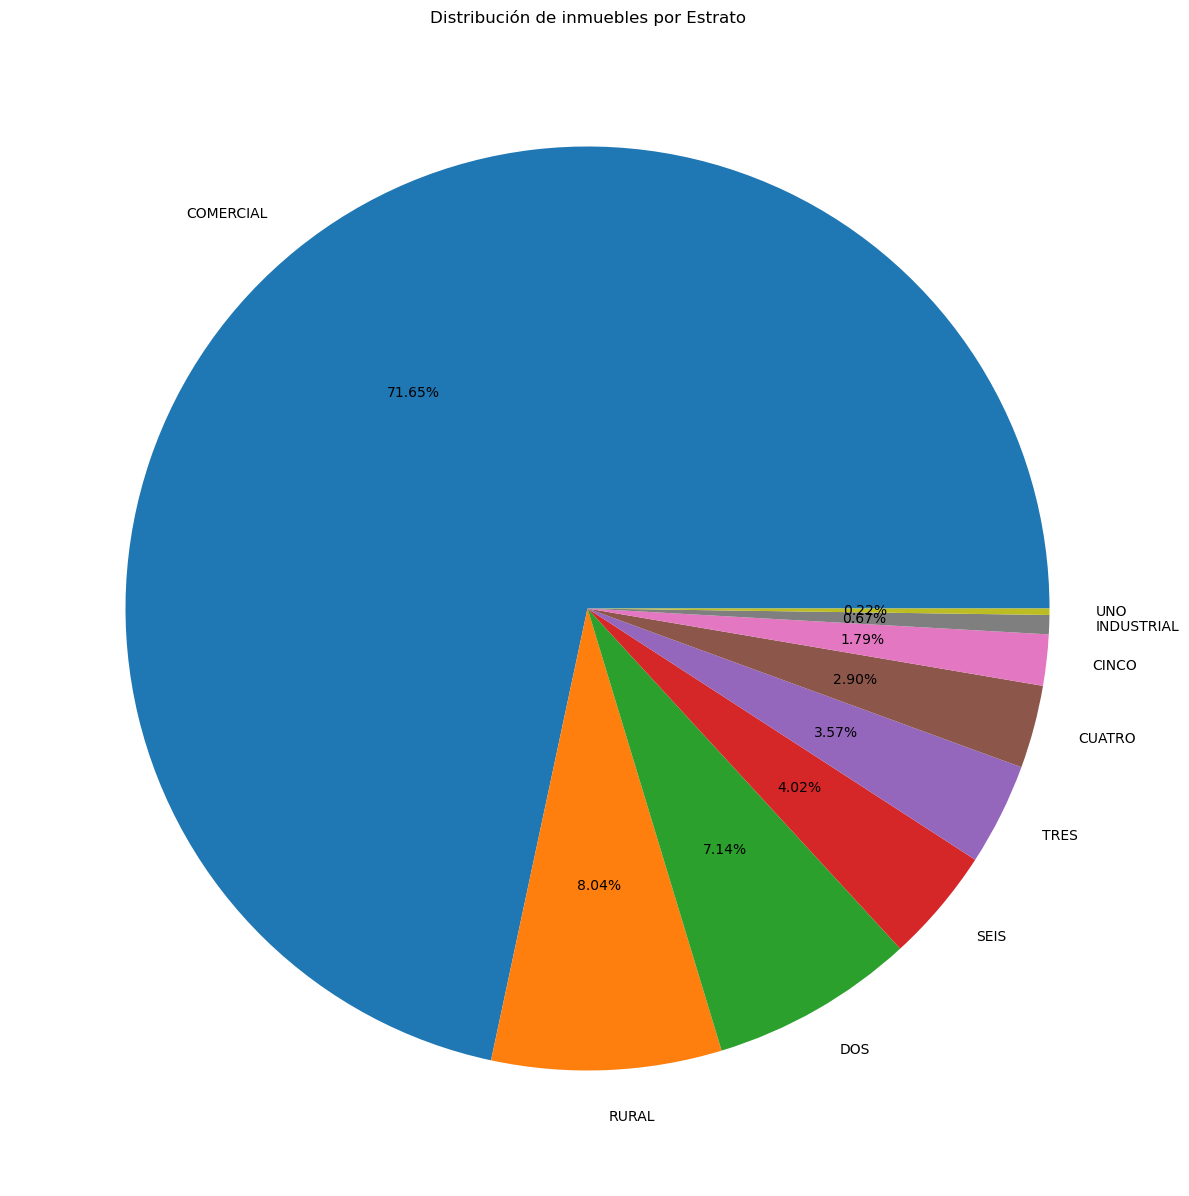

In [67]:
inmuebles_estrato = df_inmuebles['Estrato'].value_counts()
colors = sns.color_palette('tab10')
labels = inmuebles_estrato.index
plt.figure(figsize=(15, 15))
plt.pie(inmuebles_estrato, labels=labels, colors=colors, autopct='%.2f%%')
plt.title('Distribución de inmuebles por Estrato')
plt.show()

El estrato COMERCIAL presenta más inmuebles que los demás estratos. Veamos cómo están clasificados deacuerdo al tipo de inmueble.

C:\Users\juanf\AppData\Local\Temp\ipykernel_199856\3953500470.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


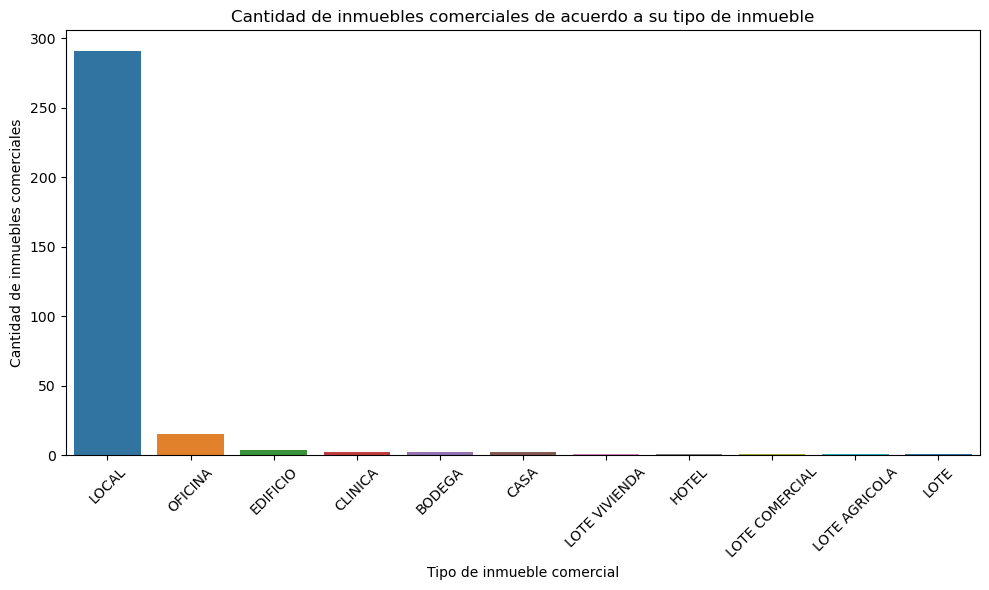

In [70]:
df_comerciales = df_inmuebles[df_inmuebles["Estrato"] == "COMERCIAL"]
inmuebles_comerciales = df_comerciales['Tipo de Inmueble'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=inmuebles_comerciales.index,
    y=inmuebles_comerciales.values,
    palette='tab10')

plt.title("Cantidad de inmuebles comerciales de acuerdo a su tipo de inmueble")
plt.xlabel("Tipo de inmueble comercial")
plt.ylabel("Cantidad de inmuebles comerciales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Los inmuebles locales son los más comunes

#### Distribución de inmuebles por Departamento ####

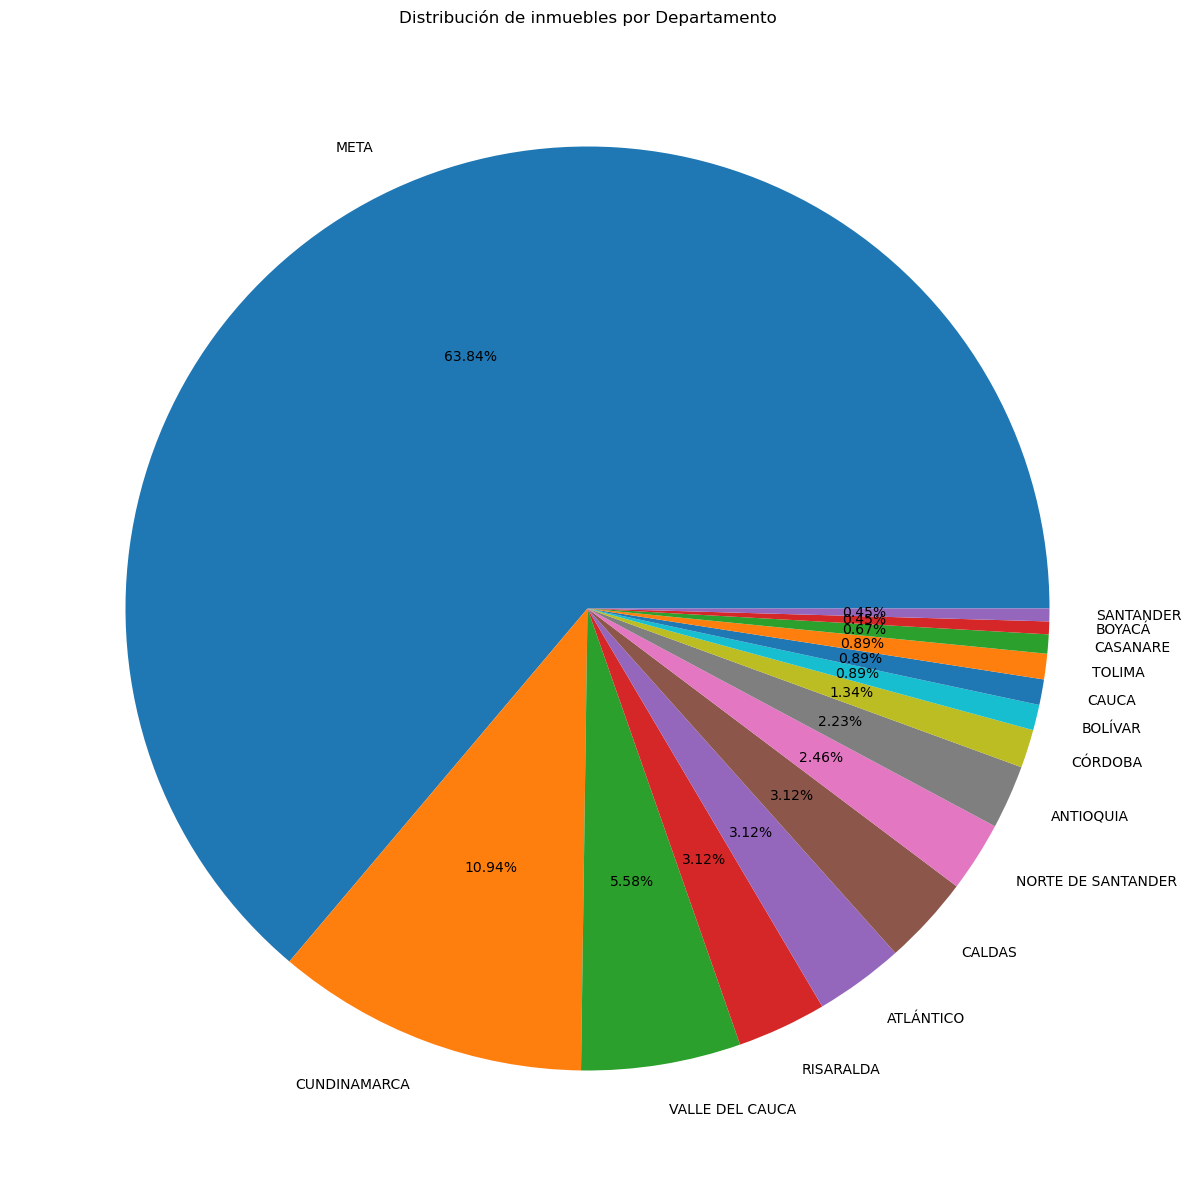

In [74]:
inmuebles_departamento = df_inmuebles['Departamento'].value_counts()
colors = sns.color_palette('tab10')
labels = inmuebles_departamento.index
plt.figure(figsize=(15, 15))
plt.pie(inmuebles_departamento, labels=labels, colors=colors, autopct='%.2f%%')
plt.title('Distribución de inmuebles por Departamento')
plt.show()

Meta presenta muchos más inmuebles que cualquier otro departamento, vemos cómo estan distribuidos por ciudad

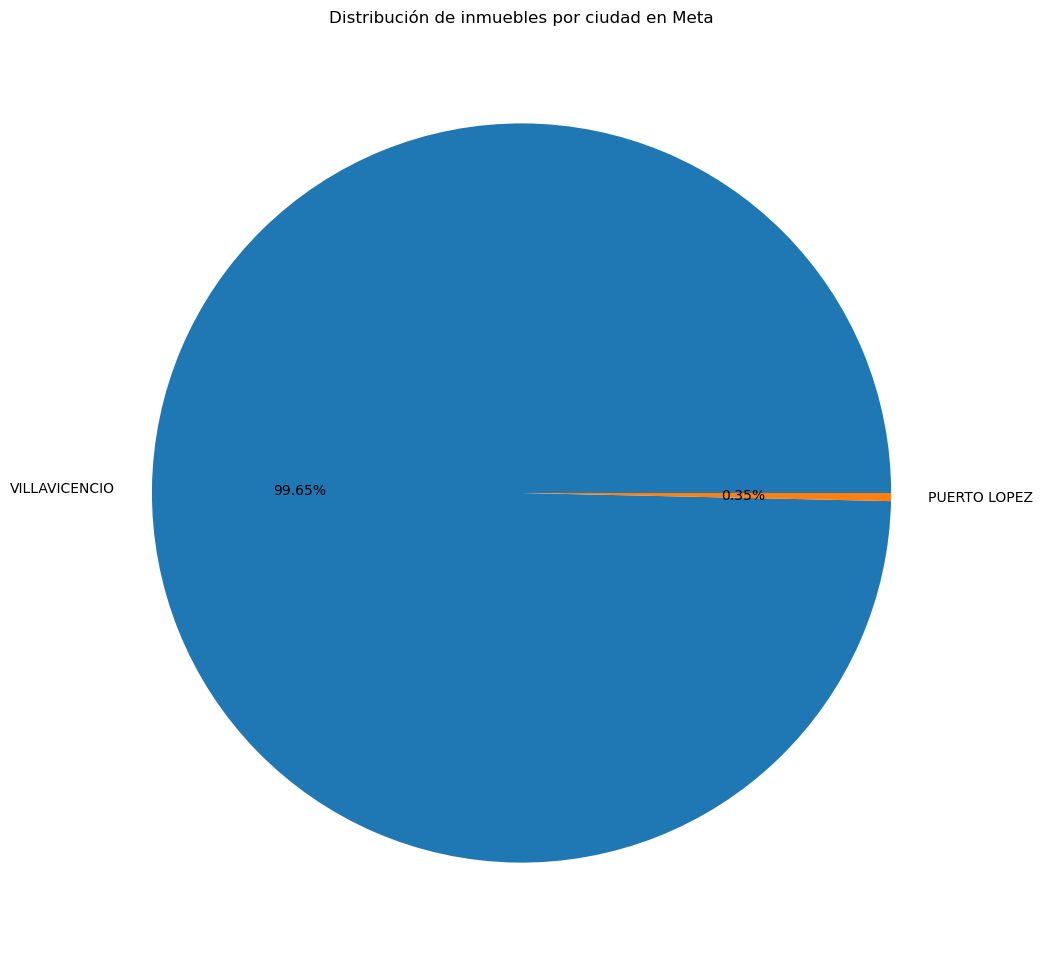

In [77]:
df_meta = df_inmuebles[df_inmuebles["Departamento"] == "META"]
inmuebles_meta_ciudad = df_meta['Ciudad'].value_counts()
colors = sns.color_palette('tab10')
labels = inmuebles_meta_ciudad.index
plt.figure(figsize=(12, 12))
plt.pie(inmuebles_meta_ciudad, labels=labels, colors=colors, autopct='%.2f%%')
plt.title('Distribución de inmuebles por ciudad en Meta')
plt.show()

La mayoría de inmuebles de Meta se encuentran en Villavicencio, veamos su distribución por estrato, tipo de inmueble, disponibilidad y rango de precios por cifras

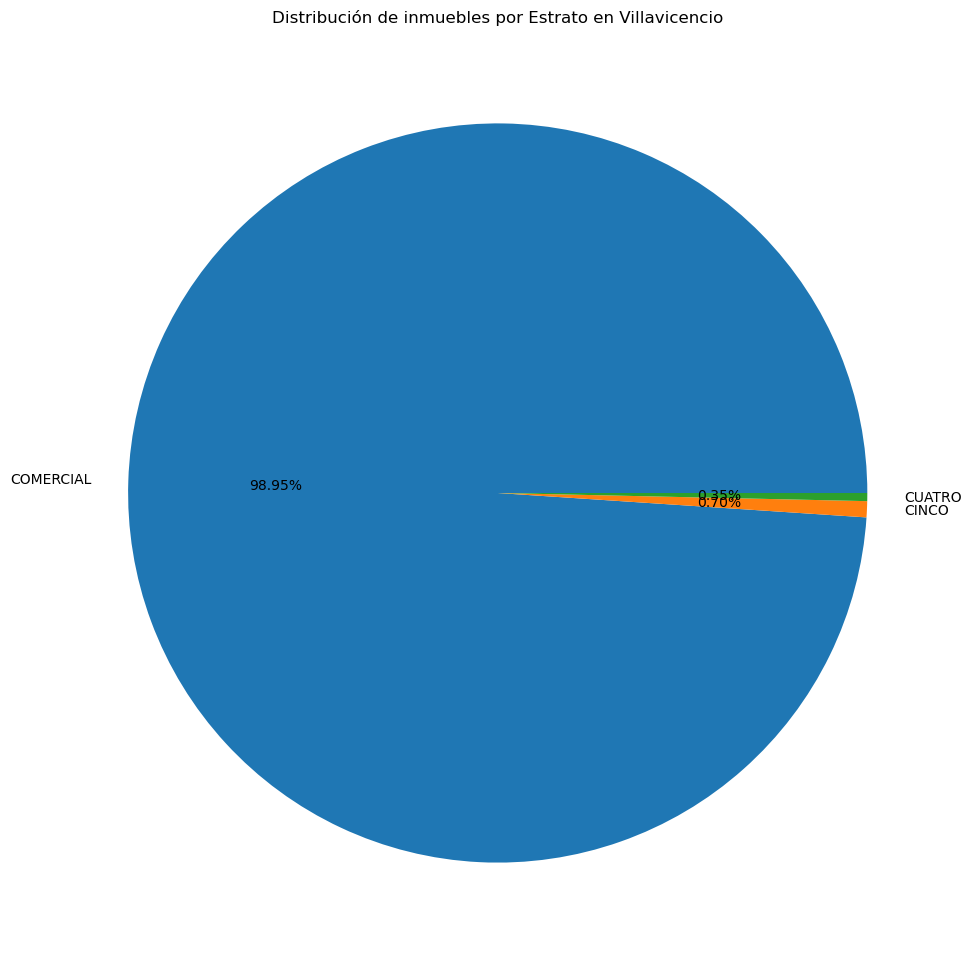

In [80]:
df_villavicencio = df_inmuebles[df_inmuebles["Ciudad"] == "VILLAVICENCIO"]
inmuebles_villavicencio = df_villavicencio['Estrato'].value_counts()
colors = sns.color_palette('tab10')
labels = inmuebles_villavicencio.index
plt.figure(figsize=(12, 12))
plt.pie(inmuebles_villavicencio, labels=labels, colors=colors, autopct='%.2f%%')
plt.title('Distribución de inmuebles por Estrato en Villavicencio')
plt.show()

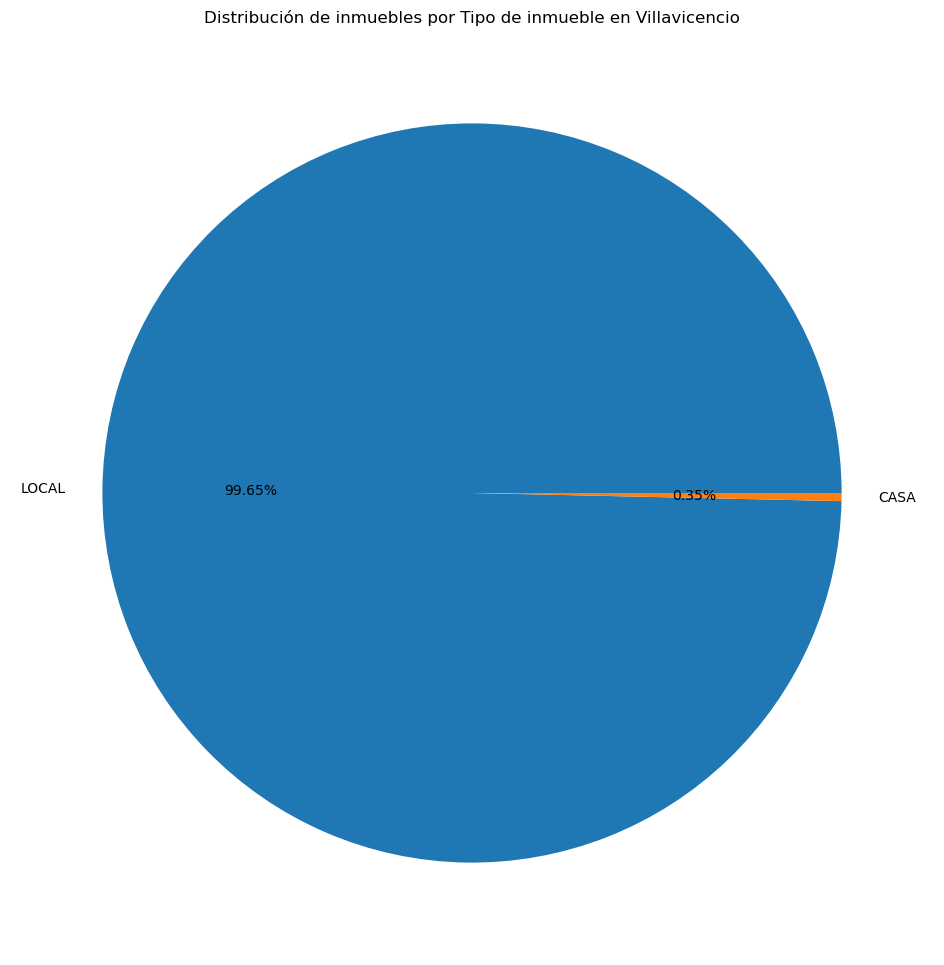

In [82]:
df_villavicencio = df_inmuebles[df_inmuebles["Ciudad"] == "VILLAVICENCIO"]
inmuebles_villavicencio = df_villavicencio['Tipo de Inmueble'].value_counts()
colors = sns.color_palette('tab10')
labels = inmuebles_villavicencio.index
plt.figure(figsize=(12, 12))
plt.pie(inmuebles_villavicencio, labels=labels, colors=colors, autopct='%.2f%%')
plt.title('Distribución de inmuebles por Tipo de inmueble en Villavicencio')
plt.show()

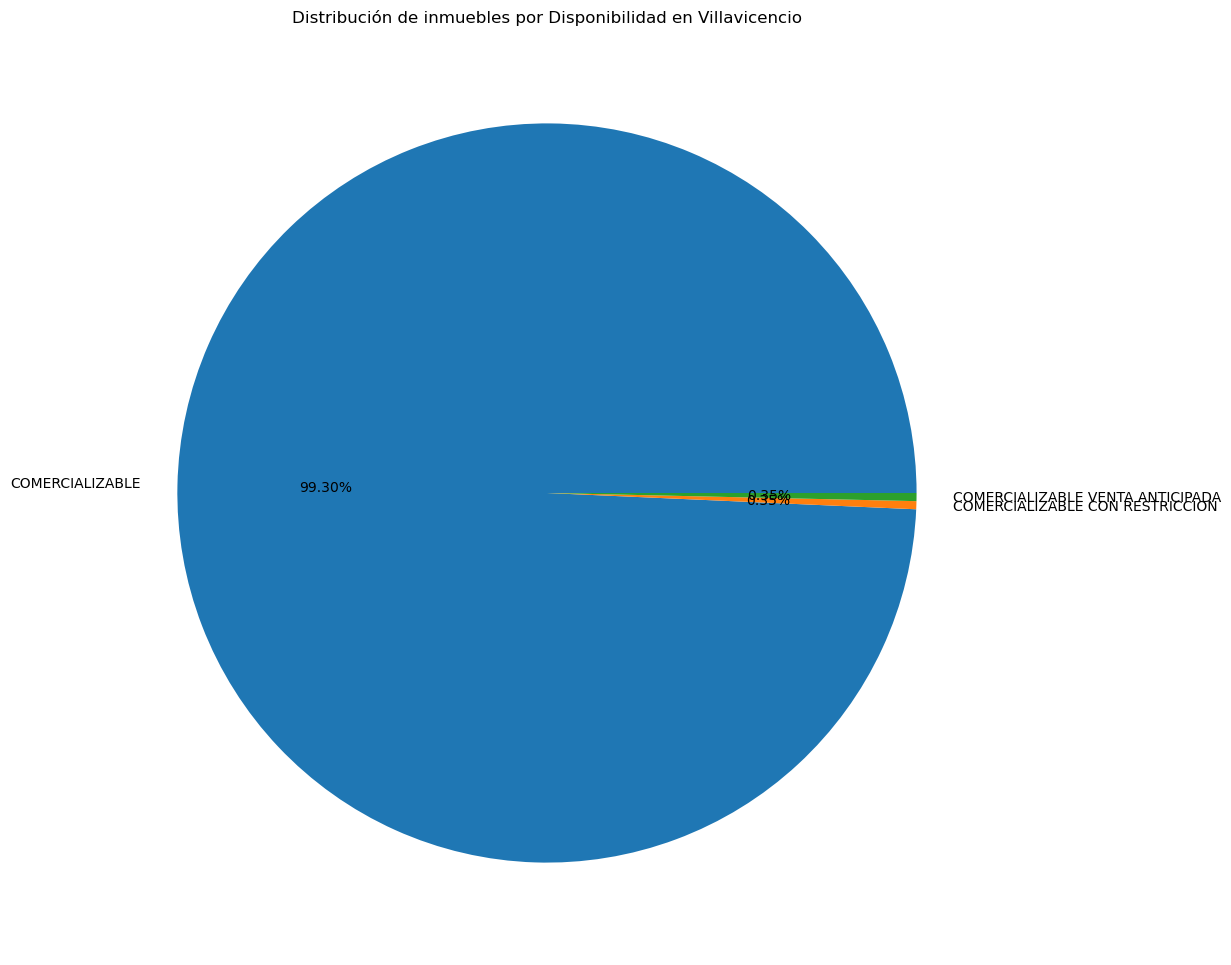

In [84]:
df_villavicencio = df_inmuebles[df_inmuebles["Ciudad"] == "VILLAVICENCIO"]
inmuebles_villavicencio = df_villavicencio['Detalle Disponibilidad'].value_counts()
colors = sns.color_palette('tab10')
labels = inmuebles_villavicencio.index
plt.figure(figsize=(12, 12))
plt.pie(inmuebles_villavicencio, labels=labels, colors=colors, autopct='%.2f%%')
plt.title('Distribución de inmuebles por Disponibilidad en Villavicencio')
plt.show()

La mayoría de inmuebles en Villavicencio son locales comerciales sin ningun tipo de condición. Ahora veamos el rango de precios en Villavicencio

C:\Users\juanf\AppData\Local\Temp\ipykernel_199856\319600202.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


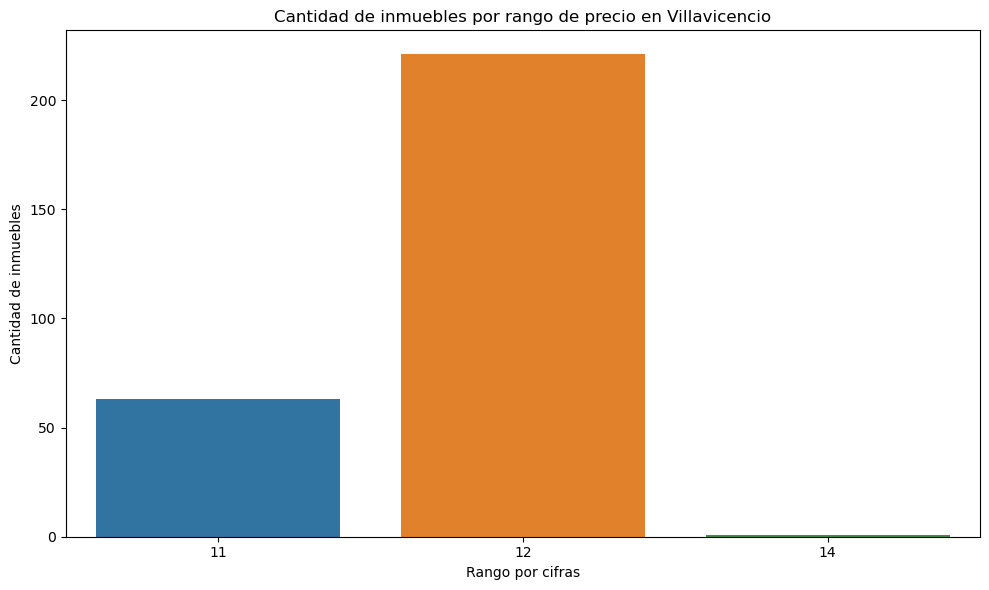

In [87]:
df_villavicencio = df_inmuebles[df_inmuebles["Ciudad"] == "VILLAVICENCIO"]
inmuebles_villavicencio = df_villavicencio['Rango por cifras'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=inmuebles_villavicencio.index,
    y=inmuebles_villavicencio.values,
    palette='tab10')

plt.title("Cantidad de inmuebles por rango de precio en Villavicencio")
plt.xlabel("Rango por cifras")
plt.ylabel("Cantidad de inmuebles")
plt.tight_layout()
plt.show()

La mayoría de inmuebles de Villavicencio tienen precios que rondan las 12 cifras

#### Distribución de inmuebles por Disponibilidad ####

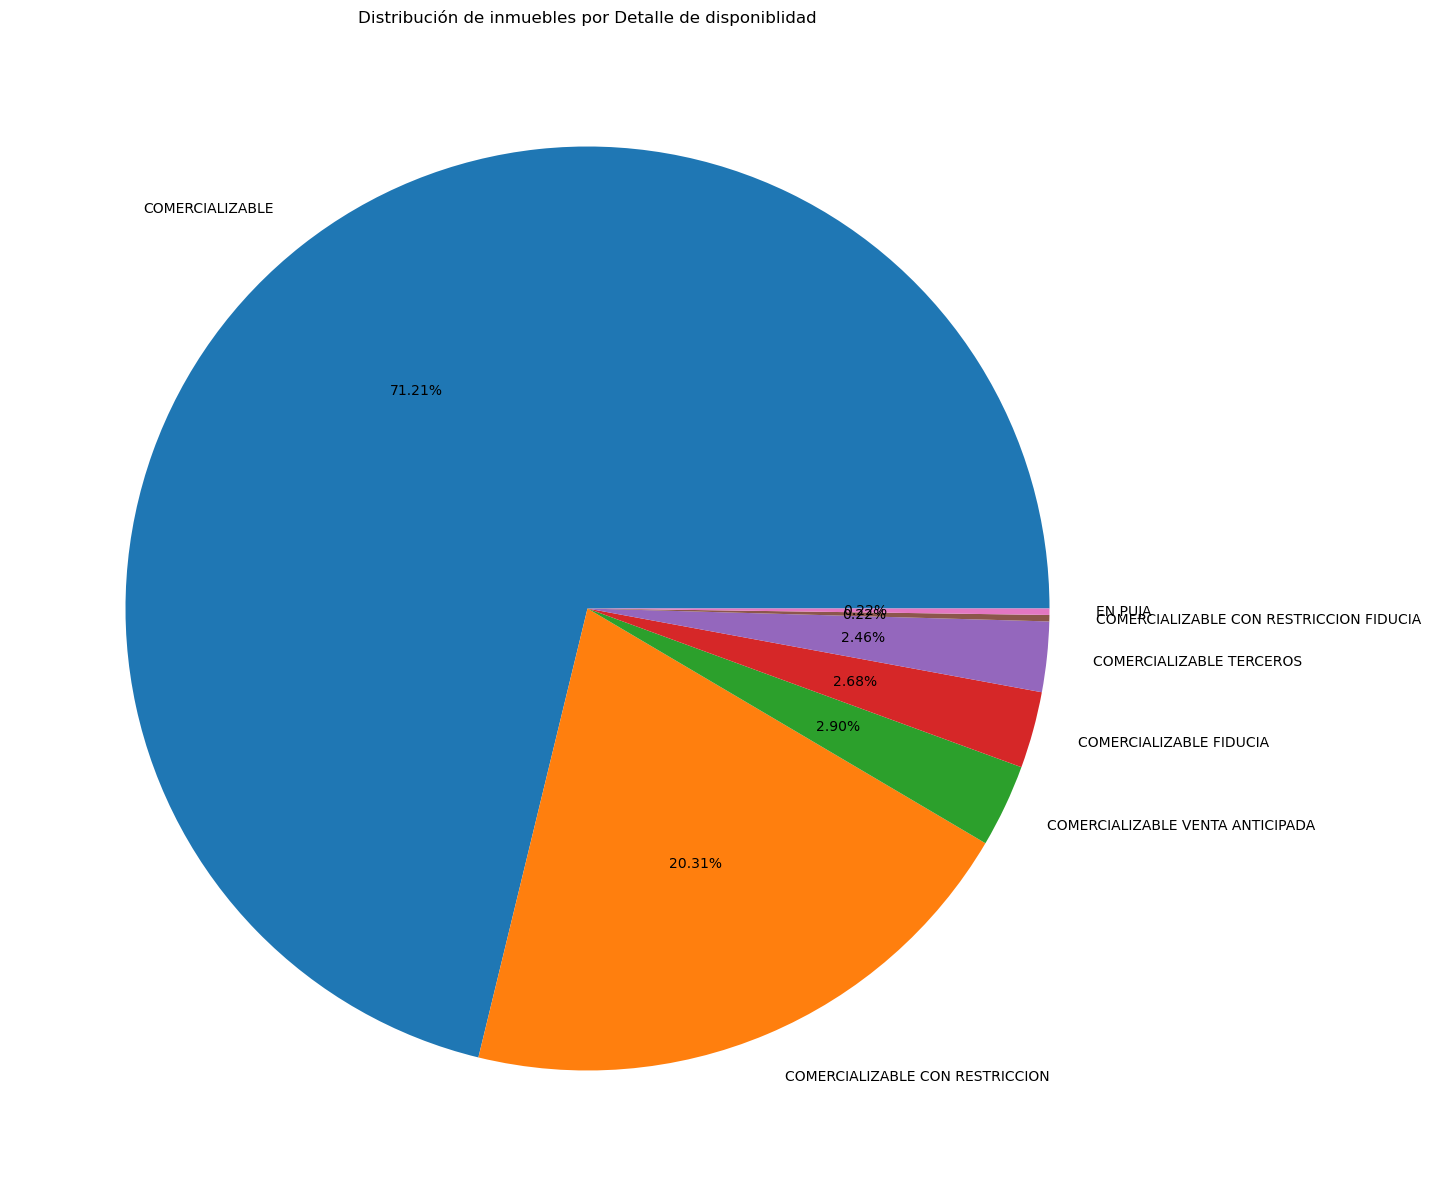

In [91]:
inmuebles_departamento = df_inmuebles['Detalle Disponibilidad'].value_counts()
colors = sns.color_palette('tab10')
labels = inmuebles_departamento.index
plt.figure(figsize=(15, 15))
plt.pie(inmuebles_departamento, labels=labels, colors=colors, autopct='%.2f%%')
plt.title('Distribución de inmuebles por Detalle de disponiblidad')
plt.show()

#### Rango de precios deacuerdo al estrato ####

C:\Users\juanf\AppData\Local\Temp\ipykernel_199856\3386445974.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_estrato_precio = sns.boxplot(


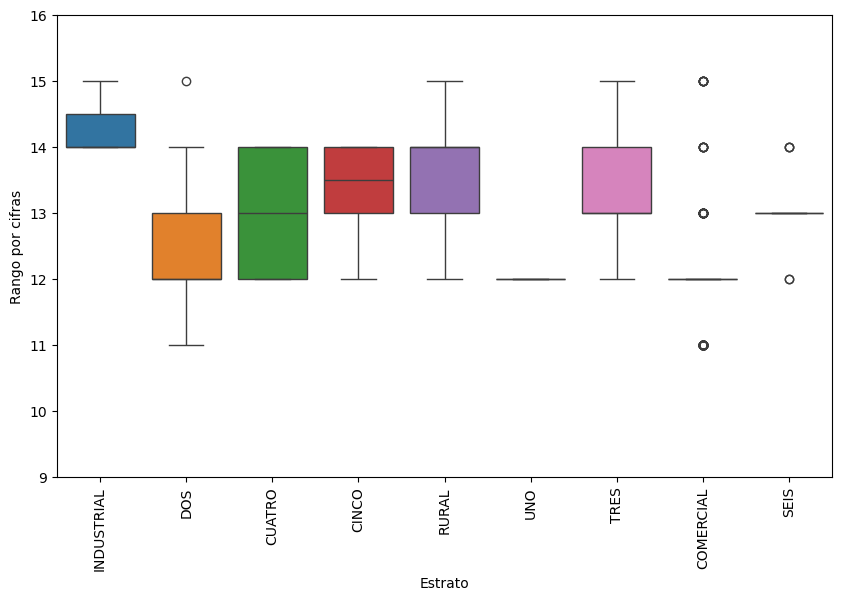

In [94]:
plt.figure(figsize=(10, 6))
plt.ylim(9,16)
plt.xticks(rotation=90)
box_estrato_precio = sns.boxplot(
    x=df_inmuebles["Estrato"],
    y=df_inmuebles["Rango por cifras"],
    palette = 'tab10')

#### Rango de precios deacuerdo al tipo de inmueble ####

C:\Users\juanf\AppData\Local\Temp\ipykernel_199856\918343210.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_estrato_precio = sns.boxplot(


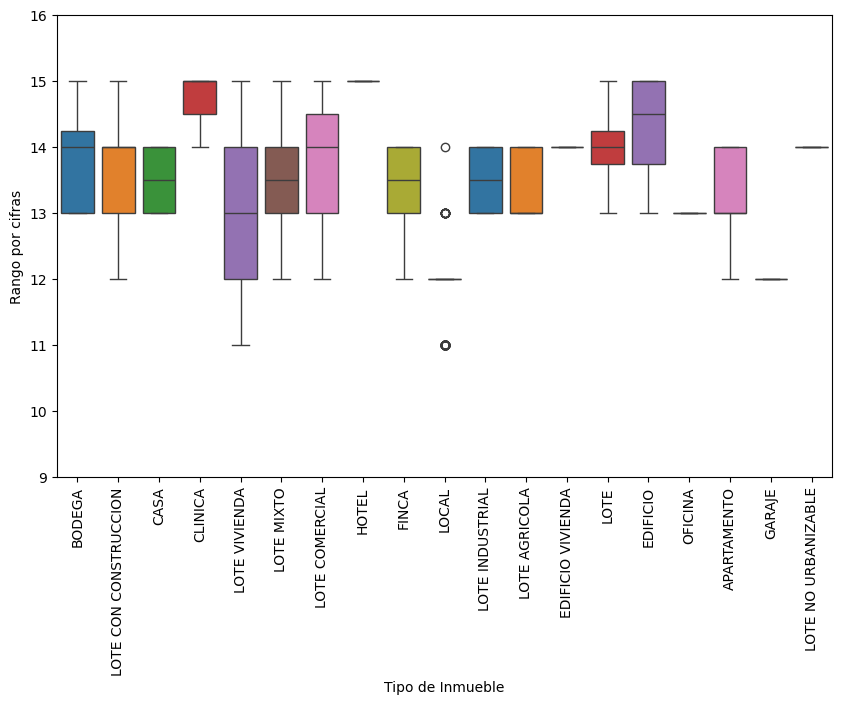

In [97]:
plt.figure(figsize=(10, 6))
plt.ylim(9,16)
plt.xticks(rotation=90)
box_estrato_precio = sns.boxplot(
    x=df_inmuebles["Tipo de Inmueble"],
    y=df_inmuebles["Rango por cifras"],
    palette = 'tab10')

Las clínicas son los inmuebles con el rango de precios más alto, seguido de edificios con un rango de precios más amplio.


#### Rango de precios deacuerdo al departamento ####

C:\Users\juanf\AppData\Local\Temp\ipykernel_199856\4108783770.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_estrato_precio = sns.boxplot(


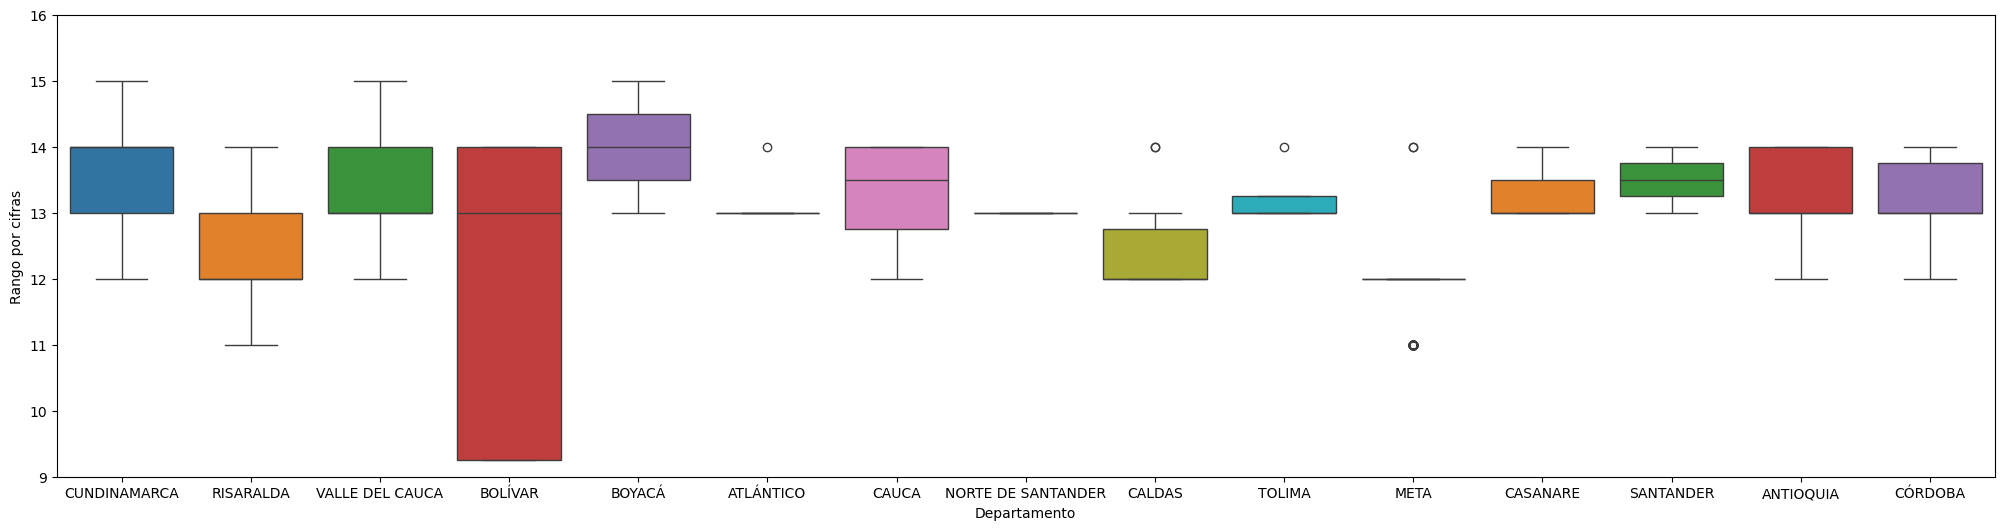

In [101]:
plt.figure(figsize=(25, 6))
plt.ylim(9,16)
box_estrato_precio = sns.boxplot(
    x=df_inmuebles["Departamento"],
    y=df_inmuebles["Rango por cifras"],
    palette = 'tab10')

Bolivar es el departamento con mayor rango de precios en los inmuebles

## Conclusiones ##

1 - La media y la moda en el rango de los precios de los inmuebles son precios que rondan las 12 cifras

2 - El estrato COMERCIAL presenta más inmuebles que los demás estratos

3 - Los inmuebles locales son los más comunes

4 - Meta presenta muchos más inmuebles que cualquier otro departamento

5 - La ciudad de Villavicencio posee la mayoría de inmuebles en Meta

6 - La mayoría de inmuebles en Villavicencio son locales comerciales sin ningun tipo de condición

7 - La mayoría de inmuebles de Villavicencio tienen precios que rondan las 12 cifras

8 - Las clínicas son los inmuebles con el rango de precios más alto, seguido de edificios con un rango de precios más amplio

9 - Bolivar es el departamento con mayor rango de precios en los inmuebles

10- En los diagramas de cajas se pueden visualizar datos atípicos en los que el rango de los precios de los inmuebles se sale de la media